In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from math import inf

In [29]:
def codifCromosomas(nCiudades,tamañoPoblación):
    """
    Esta función inicializa la población cuyos cromosomas contienen el orden en el que cada uno de los "tamañoPoblación"
    individuos recorre las "nCiudades". El orden de cada inviduo es determinado tomando una permutación aleatoria del 
    espacio de permutaciones de las ciudades (permutaciones de la lista [0,1,2,...,nCiudades-1])
    """
    conjuntoCiud = np.arange(0,nCiudades,1) # Se crea la lista de ciudades en orden [0,1,2,...,nCiudades-1]
    población = [] # Se inicializa la lista que contendrá los cromosomas
    for i in range(tamañoPoblación): 
        random.shuffle(conjuntoCiud) # Se reordena de forma aleatoria la lista original de ciudades
        población.append(conjuntoCiud.copy()) # Se añade una copia de la lista de ciudades aleatorizada
    return población

In [30]:
def coordCiudades(nCiudades):
    """
    Esta función produce las coordenadas de cada ciudad mediante las formulas x = 0.1 * ((9 + 13 * (i**2)) % 200)
    y = 0.1 * ((7 + 1327 * i) % 200) donde i = [0,1,2,...,nCiudades-1]
    """
    coordenadas = [[0.1 * ((9 + 13 * (i**2)) % 200), 0.1 * ((7 + 1327 * i) % 200)] for i in range(nCiudades)]
    return coordenadas

In [31]:
def Faj(cromosoma,coordenadas):
    """
    Esta función calcula el valor de ajuste de un cromosoma determinado donde dicho valor de ajuste es el inverso de la
    distancia recorrida si se viaja a través de cada ciudad (volviendo a la ciudad inicial) en el orden determinado por
    la información almacenada en el cromosoma. 
    """
    dist = 0 # Se inicializa la variable a la que se le sumará la distancia entre ciudad y ciudad del recorrido
    for i in range(len(cromosoma)-1): # Se recorren los valores de las coordenadas en el orden dado por la información del cromosoma
        a = coordenadas[cromosoma[i+1]] # Se toma la ciudad siguiente
        b = coordenadas[cromosoma[i]] # Se toma la ciudad actual
        dist += ((a[0]-b[0])**2+(a[1]-b[1])**2)**(1/2) # Se calcula la distancia entre las ciudades y se suma a la distancia
    # Se calcula la distancia entre la ultima ciudad y la ciudad inicial y se suma a la distancia total
    dist += ((coordenadas[cromosoma[-1]][0]-coordenadas[cromosoma[0]][0])**2+(coordenadas[cromosoma[-1]][1]-coordenadas[cromosoma[0]][1])**2)**(1/2)
    
    return (1/dist)

In [32]:
def mutación(cromosoma,p_mut):
    """
    Esta función realiza mutaciones sobre un cromosoma intercambiando las posiciones de dos ciudades (genes) dentro del cromosoma
    con una probabilidad de llevar acabo la mutación de p_mut
    """
    # Se seleccionan dos genes distintos dentro del cromosoma de forma aleatoria
    gen1_pos = random.randint(0,len(cromosoma)-1)
    gen2_pos = gen1_pos
    while gen2_pos == gen1_pos:
        gen1_pos = random.randint(0,len(cromosoma)-1)
    
    gen1 = cromosoma[gen1_pos]
    gen2 = cromosoma[gen2_pos]
    
    # Con una probabilidad de p_mut se intercambian ambos genes seleccionados
    if random.random()<p_mut:
        cromosoma[gen1_pos] = gen2
        cromosoma[gen2_pos] = gen1
    
    return cromosoma

In [33]:
def optimizacionAG(nCiudades,tamañoPoblación,mGeneraciones,p_mut):
    """
    Esta función ejecuta el algoritmo estándar de optimización del PVA mediante la aplicación de las funciones anteriormente
    descritas con mGeneraciones. 
    """
    # Se inicializa la población y se calculan las coordenadas de las ciudades
    población = codifCromosomas(nCiudades,tamañoPoblación) 
    coordenadas = coordCiudades(nCiudades)
    
    
    F_aj_prom = [] # Se inicializa la lista que contendrá los valores promedio de la población para los valores de ajuste de cada generación
    Faj_max = [] # Se inicializa la lista que contendrá el mejor valor de ajuste de la población para cada generación
    for i in range(mGeneraciones):
        
        F_aj_actual = [] # Se inicializa una variable temporal para almacenar los valores de ajuste de cada cromosoma en la generación actual
        for cromosoma in población:
            F_aj_actual.append(Faj(cromosoma,coordenadas)) # Se calcula el valor de ajuste de cada cromosoma en la población
        F_aj_prom.append(np.mean(F_aj_actual)) # Se agrega el promedio de los valores de ajuste para la generación actual en la variable respectiva
        
        # Se encuentra el valor maximo de ajuste y su respectivo número de cromosoma y se almacena dicha información en la variable respectiva
        Faj_max.append([F_aj_actual.index(max(F_aj_actual)), max(F_aj_actual)])
        
        # Se elige un cromosoma aleatorio y se aplica el operador de mutación
        ub_cromosoma = random.randint(0,len(población)-1)
        población[ub_cromosoma] = mutación(población[ub_cromosoma].copy(),p_mut)
    
    return F_aj_prom,Faj_max,población,coordenadas

In [97]:
F_aj_prom,Faj_max,población,coordenadas = optimizacionAG(100,150,5000,0.8)

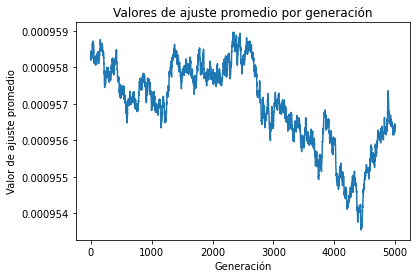

In [99]:
plt.plot(F_aj_prom)
plt.title('Valores de ajuste promedio por generación')
plt.xlabel('Generación')
plt.ylabel('Valor de ajuste promedio')
plt.show()

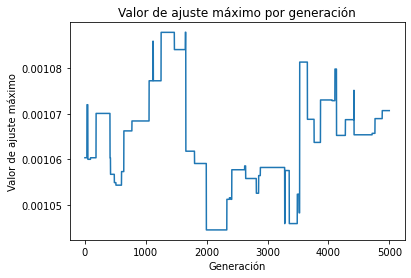

In [101]:
plt.plot([item[1] for item in Faj_max])
plt.title('Valor de ajuste máximo por generación')
plt.xlabel('Generación')
plt.ylabel('Valor de ajuste máximo')
plt.show()

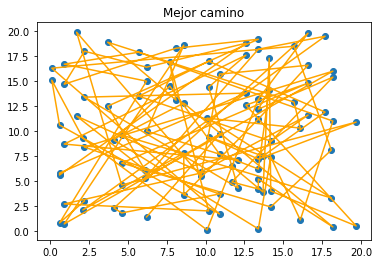

In [102]:
in_max = Faj_max[-1][0]
mej_Camino = población[Faj_max[-1][0]]

x,y = [i[0] for i in coordenadas],[i[1] for i in coordenadas]
camino_x,camino_y = [x[i] for i in mej_Camino],[y[i] for i in mej_Camino]

plt.plot(camino_x,camino_y,color = 'orange')
plt.scatter(x,y)
plt.title('Mejor camino')
plt.show()

In [104]:
def dist_Min(punto, puntos):
    """
    Esta función toma una coordenada [x,y] ("punto") y un grupo de coordenadas [[x1,y1],...,[xn,yn]] ("puntos") y encuentra
    cual coordenada de este grupo de coordenadas es el mas cercano al punto [x,y]
    """
    return distance.cdist([punto], puntos).argmin()

In [105]:
def codifCromosomas_mod(coordenadas,nCiudades,tamañoPoblación):
    """
    Esta función es una versión modificada de la función codifCromosomas en la cual se elige una ciudad inicial al azar
    para cada cromosoma y a partir de dicha ciudad se elige la ciudad siguiente de tal forma que sea la mas cercana a la ciudad 
    anterior (y asi sucesivamente) en vez de elegir aleatoriamente una permutación del espacio de permutaciones de las ciudades.
    Posteriormente, a cada ciudad (menos a la ciudad inicial) se le aplican de 3 a 10 mutaciones.
    """
    
    conjuntoCiud = np.arange(0,nCiudades,1) 
    población = []
    
    for i in range(tamañoPoblación):
        cromosoma = [random.randint(0,len(conjuntoCiud)-1)] # Se inicializa el cromosoma con un valor aleatorio para la ciudad inicial
        cop_coordenadas = coordenadas.copy() # Se crea una copia de las coordenadas con la que se calcularán las distancias
        for j in range(nCiudades-1):
            # Se modifica la entrada de la copia de las coordenadas que tiene la ciudad anterior y se reemplaza por valores infinitos de las coordenadas
            #esto para que no se tome en cuenta dicha entrada a la hora de encontrar la ciudad mas cercana.
            cop_coordenadas[cromosoma[j]] = [inf,inf] 
            cromosoma.append(dist_Min(coordenadas[cromosoma[j]],cop_coordenadas)) # Se agrega al cromosoma la ciudad mas cercana a la anterior
        población.append(cromosoma)
        
    for j in range(1,len(población)): # A cada cromosoma (sin contar el primero de la población) se le aplica el operador de mutación de 3 a 10 veces
        num_mut = random.randint(3,10)
        for i in range(num_mut):
            población[j] = mutación(población[j].copy(),1)
    
    return población

In [106]:
def optimizacionAG_mod(nCiudades,tamañoPoblación,mGeneraciones,p_mut):
    """
    Esta función es una versión modificada de la función optimizacionAG donde la unica diferencia es que se trabaja con la población
    modificada en vez de la población estándar.
    """
    coordenadas = coordCiudades(nCiudades)
    población = codifCromosomas_mod(coordenadas,nCiudades,tamañoPoblación)
    
    
    F_aj_prom = [] # Se inicializa la lista que contendrá los valores promedio de la población para los valores de ajuste de cada generación
    Faj_max = [] # Se inicializa la lista que contendrá el mejor valor de ajuste de la población para cada generación
    for i in range(mGeneraciones):
        
        F_aj_actual = [] # Se inicializa una variable temporal para almacenar los valores de ajuste de cada cromosoma en la generación actual
        for cromosoma in población:
            F_aj_actual.append(Faj(cromosoma,coordenadas)) # Se calcula el valor de ajuste de cada cromosoma en la población
        F_aj_prom.append(np.mean(F_aj_actual)) # Se agrega el promedio de los valores de ajuste para la generación actual en la variable respectiva
        
        # Se encuentra el valor maximo de ajuste y su respectivo número de cromosoma y se almacena dicha información en la variable respectiva
        Faj_max.append([F_aj_actual.index(max(F_aj_actual)), max(F_aj_actual)])
        
        # Se elige un cromosoma aleatorio y se aplica el operador de mutación
        ub_cromosoma = random.randint(0,len(población)-1)
        población[ub_cromosoma] = mutación(población[ub_cromosoma].copy(),p_mut)
    
    return F_aj_prom,Faj_max,población,coordenadas

In [108]:
Faj_promMod,Faj_maxMod,poblaciónMod,coordenadasMod = optimizacionAG_mod(100,150,5000,0.8)

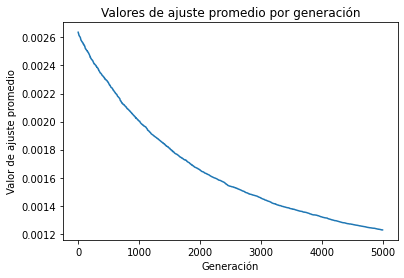

In [109]:
plt.plot(Faj_promMod)
plt.title('Valores de ajuste promedio por generación')
plt.xlabel('Generación')
plt.ylabel('Valor de ajuste promedio')
plt.show()

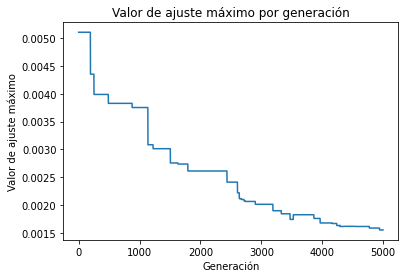

In [110]:
plt.plot([item[1] for item in Faj_maxMod])
plt.title('Valor de ajuste máximo por generación')
plt.xlabel('Generación')
plt.ylabel('Valor de ajuste máximo')
plt.show()

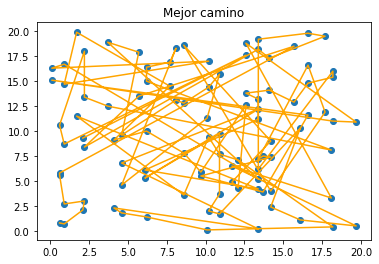

In [111]:
in_maxMod = Faj_maxMod[-1][0]
mej_CaminoMod = poblaciónMod[Faj_maxMod[-1][0]]

xMod,yMod = [i[0] for i in coordenadas],[i[1] for i in coordenadas]
camino_xMod,camino_yMod = [x[i] for i in mej_CaminoMod],[y[i] for i in mej_CaminoMod]

plt.plot(camino_xMod,camino_yMod,color = 'orange')
plt.scatter(xMod,yMod)
plt.title('Mejor camino')
plt.show()